## Ultima Tarea

### Juan David Sanabria Bello

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

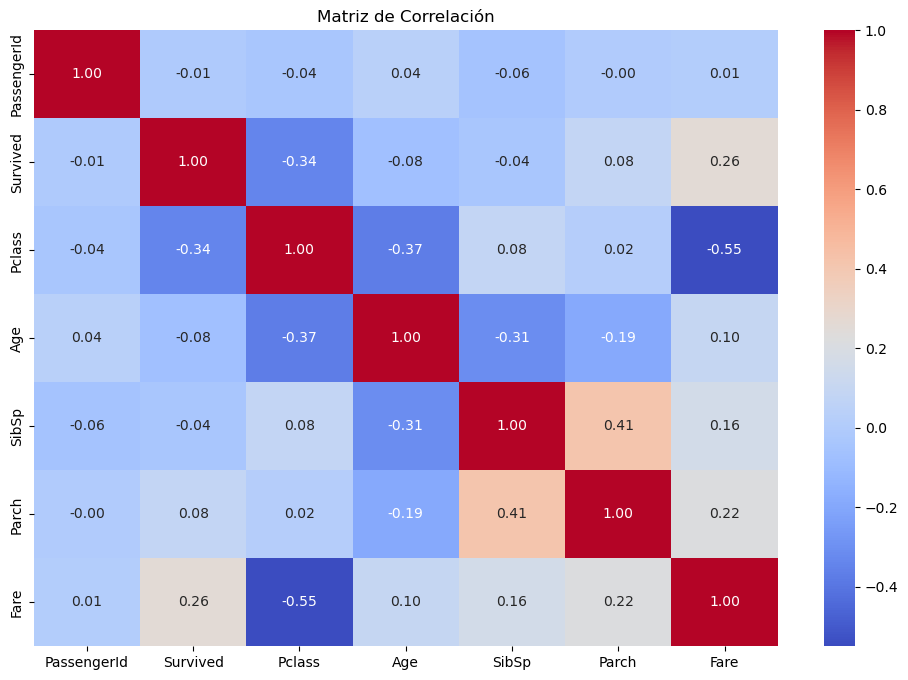

Características seleccionadas: Index(['PassengerId', 'Pclass', 'Age', 'Fare', 'Sex_male'], dtype='object')
Matriz de Confusión:
[[83 22]
 [27 47]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       105
           1       0.68      0.64      0.66        74

    accuracy                           0.73       179
   macro avg       0.72      0.71      0.71       179
weighted avg       0.72      0.73      0.72       179



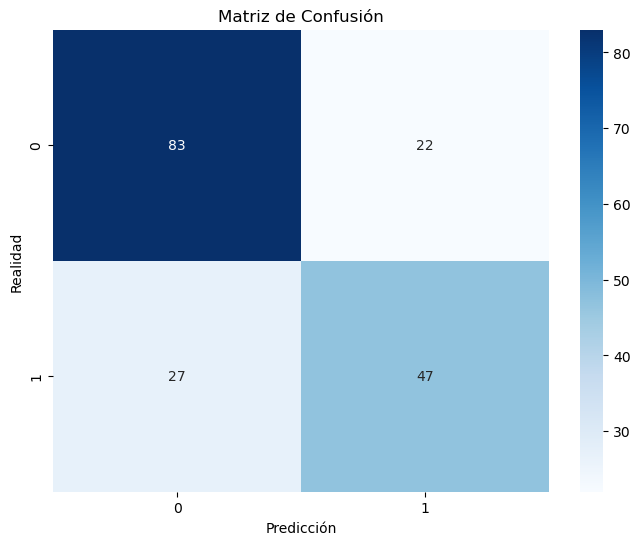

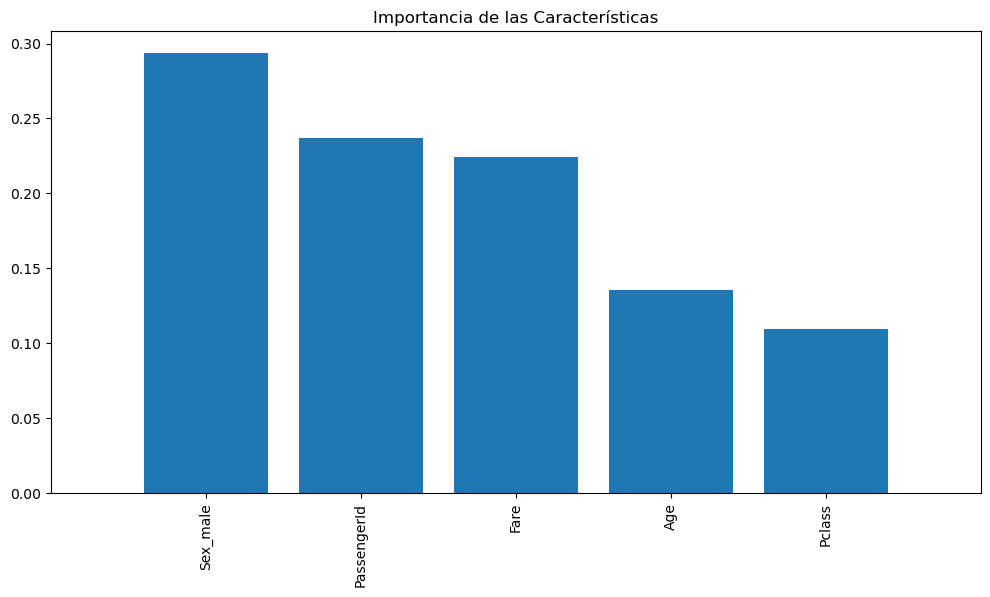

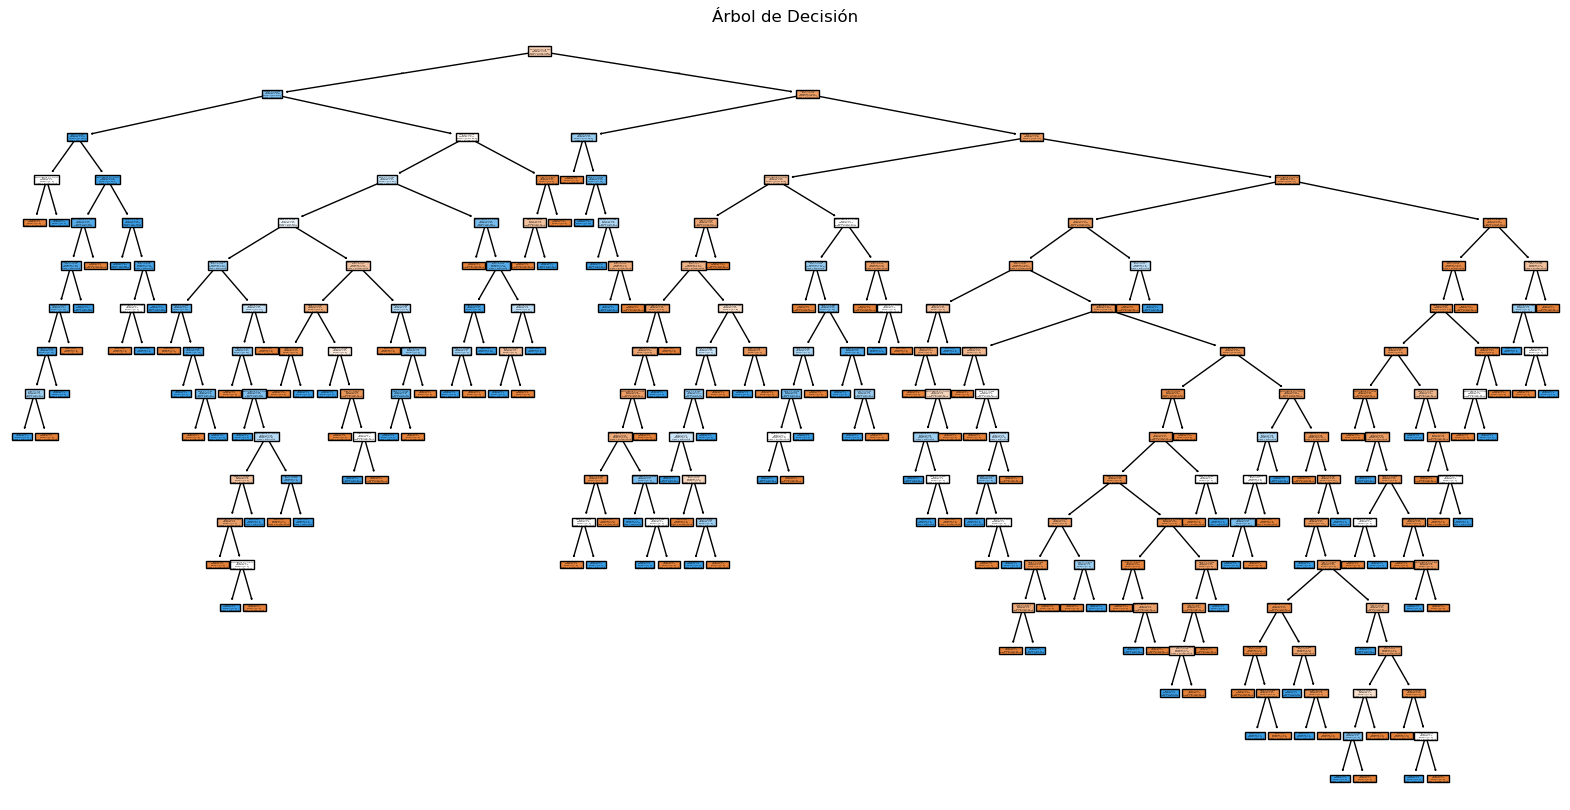

In [10]:
# Importar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings

# Ignorar advertencias
warnings.filterwarnings("ignore")

# 1. Cargar el conjunto de datos
data = pd.read_csv('Titanic.csv')

# 2. Análisis Exploratorio de Datos (EDA)
print(data.head())
print(data.describe())
print(data.info())

# Matriz de correlación (solo para columnas numéricas iniciales)
plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# 3. Preprocesamiento de Datos
# Eliminar columnas irrelevantes
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Manejo de valores nulos
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Codificar variables categóricas
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# 4. Selección de Características
# Separar características y variable objetivo
X = data.drop('Survived', axis=1)
y = data['Survived']

# Seleccionar las 5 características más importantes usando RFE
model = DecisionTreeClassifier(random_state=42)
selector = RFE(model, n_features_to_select=5)
selector = selector.fit(X, y)
selected_features = X.columns[selector.support_]
print("Características seleccionadas:", selected_features)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# 5. Estandarización de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Entrenar el Modelo
model.fit(X_train, y_train)

# 7. Evaluar el Desempeño del Modelo
y_pred = model.predict(X_test)
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 8. Visualización de Resultados
# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Importancia de características
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importancia de las Características")
plt.bar(range(len(selected_features)), importances[indices], align="center")
plt.xticks(range(len(selected_features)), np.array(selected_features)[indices], rotation=90)
plt.xlim([-1, len(selected_features)])
plt.show()

# Visualización del Árbol de Decisión
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=selected_features, class_names=['No sobrevivió', 'Sobrevivió'], filled=True)
plt.title('Árbol de Decisión')
plt.show()
